# Задача 2

In [1]:
import pandas as foat # Библиотека для работы с табличными данными
import numpy as np # Библиотека для вычислений линейной алгебры
# Библиотеки для визуализации
import seaborn as timon
import matplotlib.pyplot as elj

In [2]:
df = foat.read_csv('california.csv') # Начнем с чтения csv данных

In [3]:
df.head() # Первые пять строк

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


<Axes: xlabel='longitude', ylabel='latitude'>

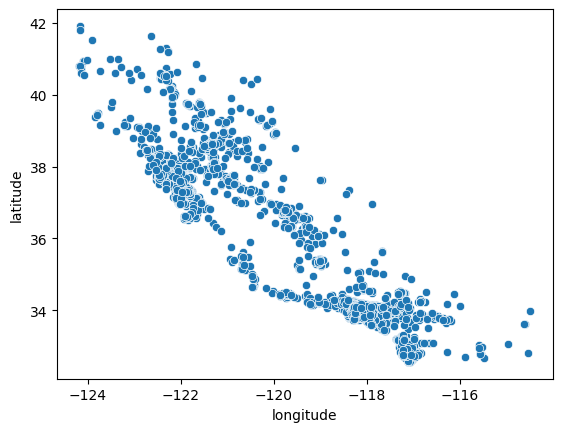

In [4]:
# Изображения точек долготы по отношению к широте.
# Можно заметить, что дома расположены в определенной "полосе" долготы и широты
timon.scatterplot(data = df, x="longitude", y="latitude")

<Axes: xlabel='population', ylabel='households'>

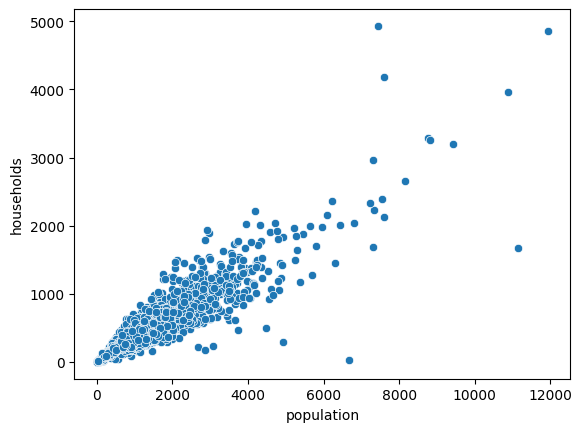

In [5]:
# Самостоятельная работа №1
# Изобразите отношение households к population
timon.scatterplot(data = df, x="population", y="households")

<Axes: xlabel='population', ylabel='households'>

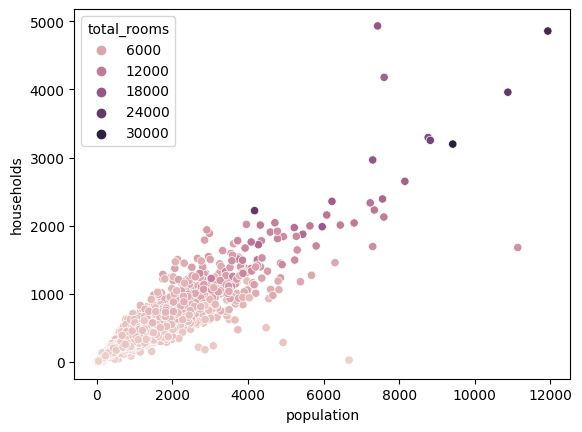

In [6]:
# Помимо двумерных отношений, мы можем добавить "дополнительное измерение" с помощью цвета. 
# В данном случае опять же достаточно очевидное отношение, чем выше кол-во семей, тем выше 
# кол-во людей и соответвтственно комнат
timon.scatterplot(data = df, x ="population", y ="households", hue ="total_rooms")


<Axes: xlabel='population', ylabel='households'>

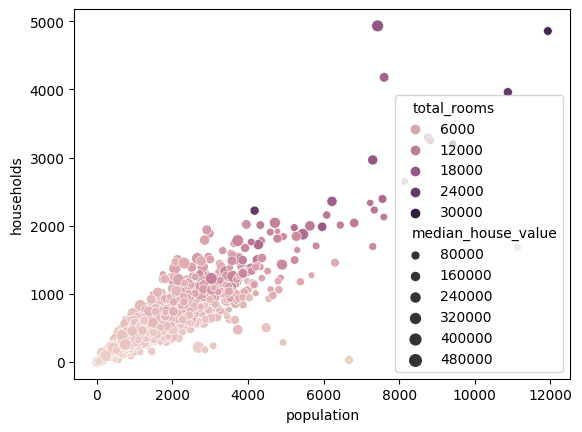

In [7]:
# Помимо обозначения дополнительного измерения цветом мы можем использовать size
# Самостоятельная работа №2
# Добавьте total_rooms используя дополнительное измерение size
timon.scatterplot(data = df, x="population", y="households", hue="total_rooms", size="median_house_value")

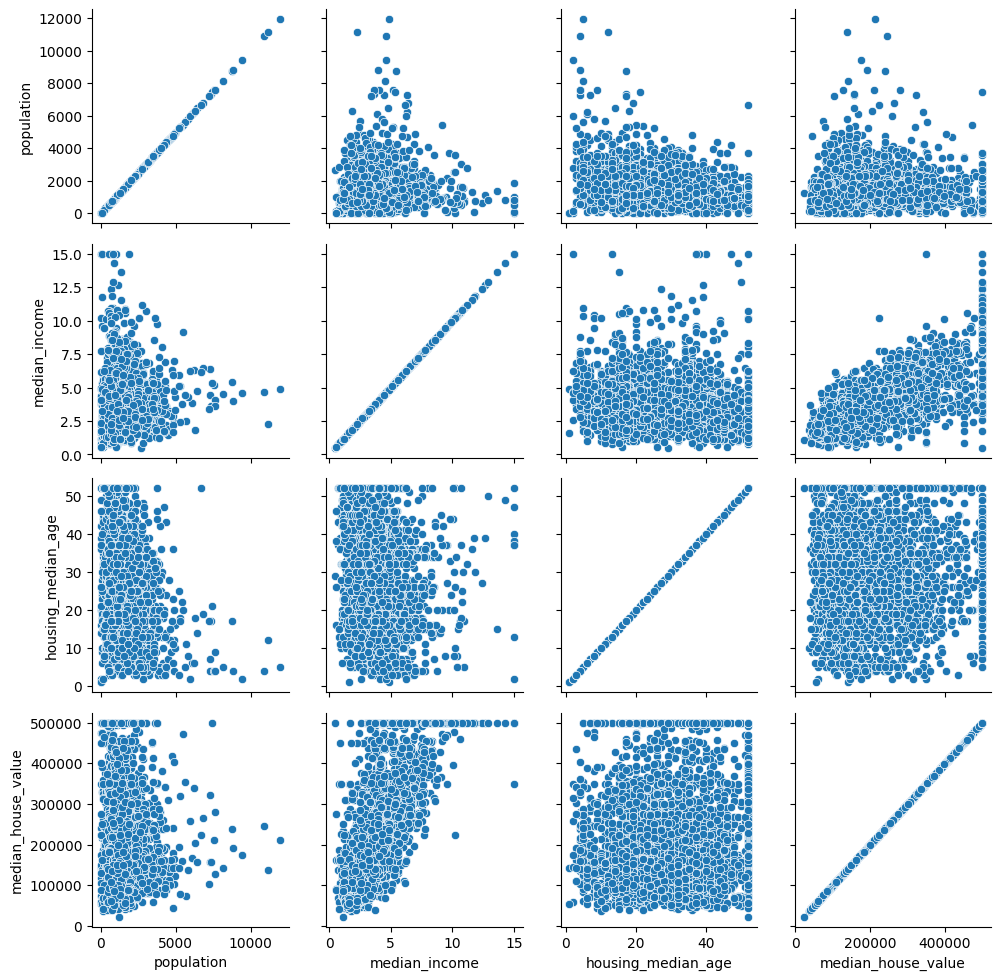

In [8]:
# Мы можем визуализировать сразу несколько отношений используя класс PairGrid внутри seaborn.
# PairGrid принимает как аргумент pandas DataFrame и визуализирует все возможные 
# отношения между ними, в соответствии с выбранным типом графика.
cols = ['population', 'median_income', 'housing_median_age', 'median_house_value']
g = timon.PairGrid(df[cols])
g.map(timon.scatterplot)
# Как вы думаете, чем вызвана линейная зависимость по диагонали?

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


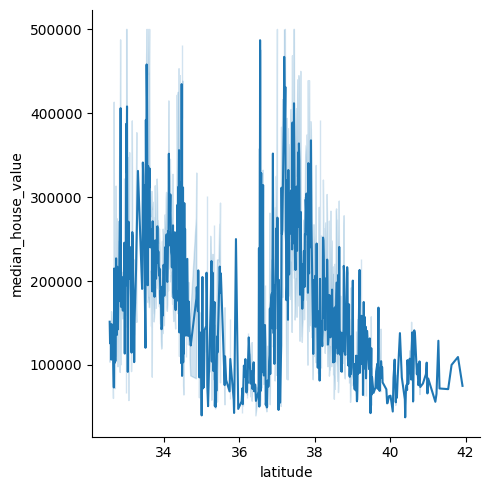

In [9]:
# Линейные графики
# Хорошо подойдут, если есть временная или кака-либо иная последовательность и значения, 
# которые могум меняться в зависимости от неё.
# Для генерации линейных графиков в seaborn используется relplot функция.
# Она также принимает DataFrame, x, y - столбцы.
# Для визуализации выбирается тип line
timon.relplot(x="latitude", y="median_house_value", kind="line", data=df)
# Можно видеть, что в определеных местах долготы цена за дома резко подскакивает

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


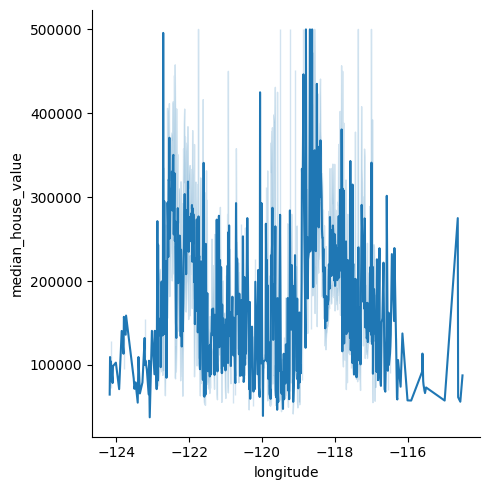

In [10]:
# Самостоятельная работа №3
# Визуализировать longitude по отношения к median_house_value
# Используя линейный график
timon.relplot(x="longitude", y="median_house_value", kind="line", data=df)
# Можно видеть, что в определеных местах широты цена за дома также очень высока
# Используя точечный график можно визуализировать эти отношения с большей четкостью. 
# Скорее всего резкий рост цен связан с близостью к ценному объекту, 
# повышающему качество жизни, скорее всего побережью океана или реки.

<Axes: xlabel='latitude', ylabel='longitude'>

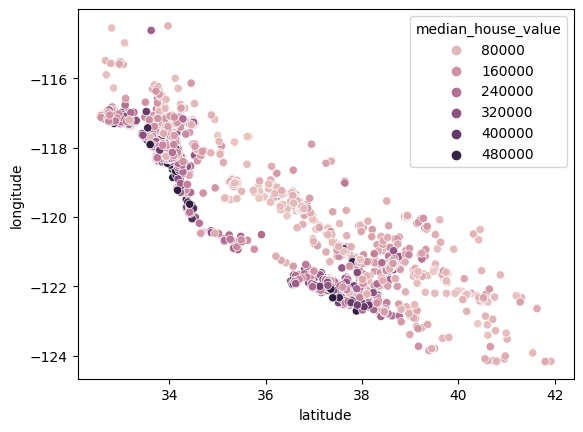

In [11]:
timon.scatterplot(data=df, x="latitude", y="longitude",  hue="median_house_value")

<Axes: xlabel='median_income', ylabel='Count'>

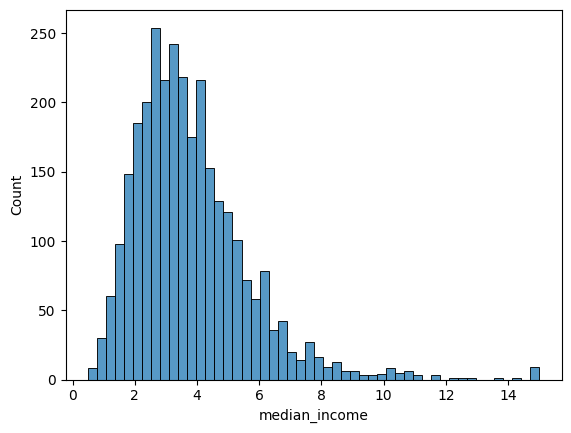

In [12]:
# Гистограмма
# Способ представления табличных данных в графическом виде — в виде столбчатой
#  диаграммы. По оси x обычно указывают значение, а по оси y - встречаемость
# (кол-во таких значений в выборке)
timon.histplot(data=df, x="median_income")
# Можно видеть что у большинства семей доход находится между значениями 2 и 6.
# И только очень небольшое ко-во людей обладают доходом > 10

<Axes: xlabel='housing_median_age', ylabel='Count'>

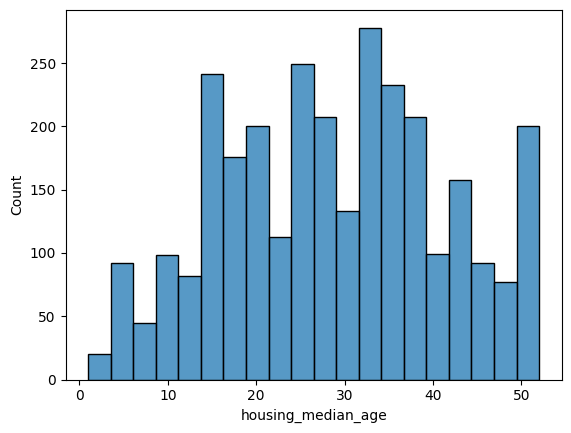

In [13]:
# Самостоятельная работа №5
# Изобразить гистограмму по housing_median_age
timon.histplot(data=df, x="housing_median_age")
# Распределение по возрасту более равномерное.
# Большую часть жителей составляют люди в возрасте 
# от 20 до 40 лет. Но и молодежи не мало.
# Также очень много пожилых людей > 50 лет медианный возраст.

<Axes: xlabel='median_income', ylabel='Count'>

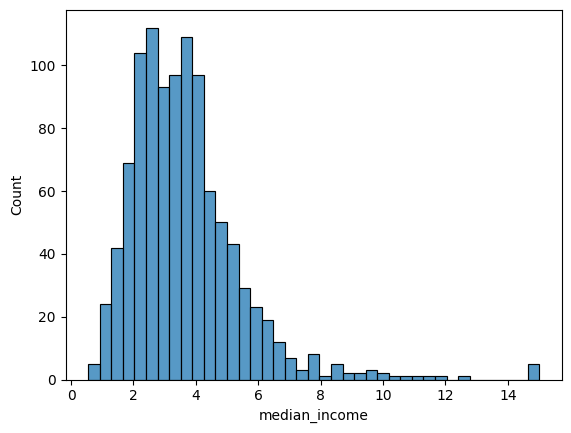

In [14]:
# Давайте посмотрим медианный доход у пожилых жителей
# Чтобы изменить содержимое ячейки, дважды нажмите на нее (или выберите "Ввод")
timon.histplot(data=df[( df['housing_median_age'] < 45) & 
                       ( df['housing_median_age'] > 30)], x="median_income")


<Axes: xlabel='population', ylabel='Count'>

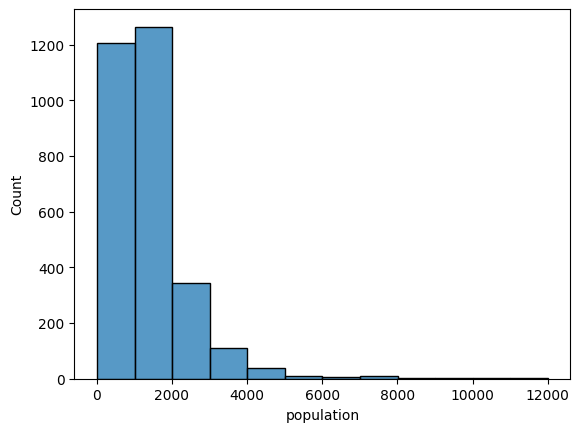

In [15]:
# Большого отличия от популяции в целом не наблюдается.
# Скорее всего это местные жители.
# Давайте посмотрим на популяцию.
timon.histplot(data=df, x="population", binwidth=1000)

In [16]:
# Разобьем возрастные группы на 3 категории те кто моложе 20 лет,
#  от 20 до 50 и от 50, чтобы посмотреть влияет ли это на доход.
df.loc[df['housing_median_age'] <= 20, 'age_group'] = 'Молодые'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <= 50), 'age_group'] = 'В хорошем состоянии'
df.loc[df['housing_median_age'] > 50, 'age_group'] = 'Ветхие'
# Применим group_by, чтобы получить среднее значение (дополнительный столбец)

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_group
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,В хорошем состоянии
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,В хорошем состоянии
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,В хорошем состоянии
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,В хорошем состоянии
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,Молодые


<Axes: xlabel='age_group'>

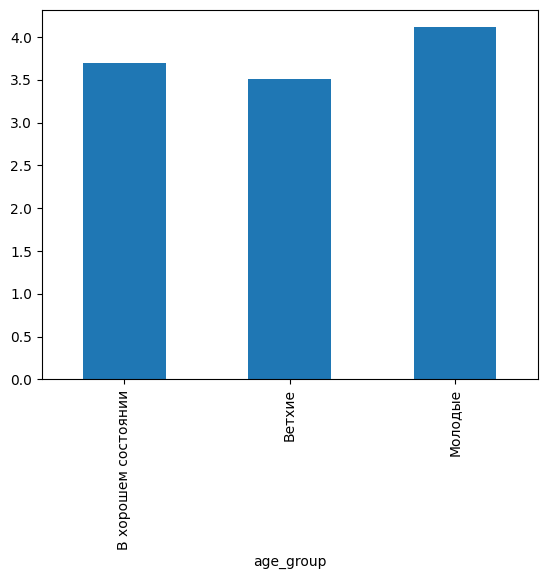

In [18]:
df.groupby('age_group')['median_income'].mean().plot(kind='bar')
# Молодые оказываются самой богатой группой населения.
# Но отличие в доходе не значительное.

In [19]:
# Seaborn так же позволяет нам смотреть распределение по многим параметрам.
# Давайте поделим группы по доходам на 2. Те у кого медианный доход выше 6
# и те у кого меньше. Изобразим дополнительное измерение с помощью оттенка 
# в виде возрастных групп и групп по доходам.
df['income_group'] = 'бедные'
df.loc[df['median_income'] >= 6, 'income_group'] = 'богатые'
df.loc[(df['median_income'] < 6) & (df['median_income'] > 2), 'income_group'] = 'средний класс'



In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_group,income_group
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,В хорошем состоянии,богатые
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,В хорошем состоянии,средний класс
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,В хорошем состоянии,средний класс
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,В хорошем состоянии,богатые
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,Молодые,средний класс


<Axes: xlabel='income_group', ylabel='Count'>

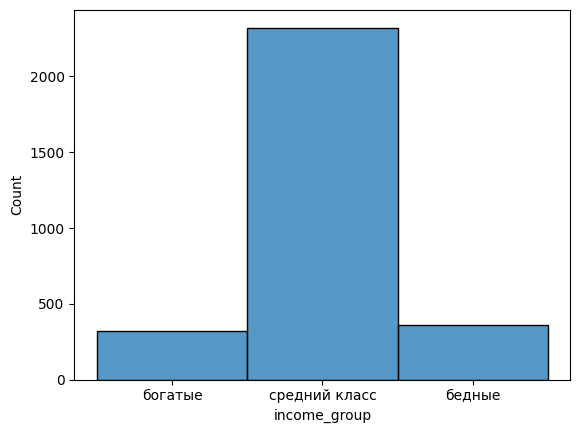

In [21]:
timon.histplot(data=df, x = 'income_group')

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


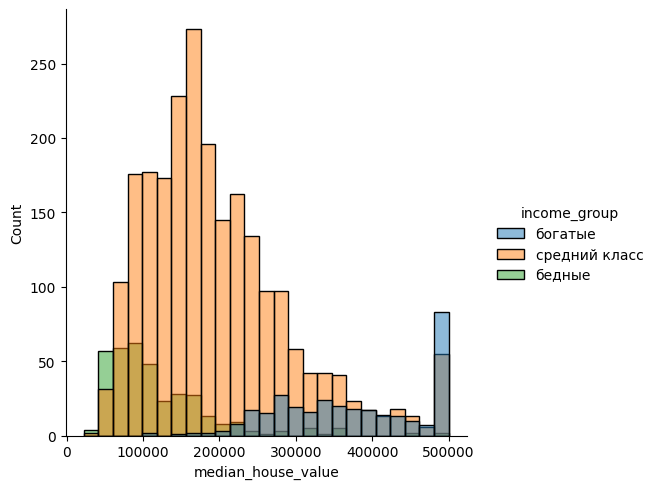

In [22]:
timon.displot(df, x="median_house_value", hue="income_group")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


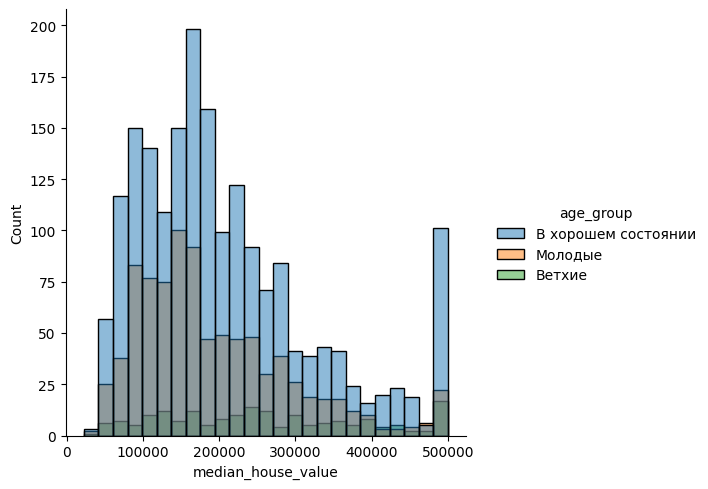

In [23]:
# Самостоятельная работа
# Изобразить гистограмму по median_house_value с оттенком age_group
timon.displot(df, x="median_house_value", hue="age_group")

# Heatmaps(Корелляция)
Посмотрим как данные коррелируют между собой.

In [24]:
corr = df.corr()

ValueError: could not convert string to float: 'В хорошем состоянии'

In [25]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Создаем полотно для отображения большого графика
f, ax = elj.subplots(figsize=(11, 9))

# Создаем цветовую политру
cmap = timon.diverging_palette(230, 20, as_cmap=True)

# Визуализируем данные кореляции
timon.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'corr' is not defined